In [1]:
!git clone https://github.com/feralvam/easse.git
%cd easse
!pip install -e .
%cd ..

Cloning into 'easse'...
remote: Enumerating objects: 1937, done.
remote: Counting objects: 100% (504/504), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 1937 (delta 289), reused 347 (delta 194), pack-reused 1433
Receiving objects: 100% (1937/1937), 33.79 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (1162/1162), done.
/content/easse
Obtaining file:///content/easse
  Cloning https://github.com/facebookresearch/text-simplification-evaluation.git to /tmp/pip-install-a6bm_ond/tseval_e5e76f1128ba48c99eeca06af1bf158b
  Running command git clone -q https://github.com/facebookresearch/text-simplification-evaluation.git /tmp/pip-install-a6bm_ond/tseval_e5e76f1128ba48c99eeca06af1bf158b
  Cloning https://github.com/cisnlp/simalign.git to /tmp/pip-install-a6bm_ond/simalign_4c73096224fe4981b6d8c255410eda60
  Running command git clone -q https://github.com/cisnlp/simalign.git /tmp/pip-install-a6bm_ond/simalign_4c73096224fe4981b6d8c255410eda60
  Installing build dependencie

In [2]:
!git clone https://github.com/facebookresearch/muss.git
%cd muss/
!pip install -e .   # Install package
!python -m spacy download en_core_web_md
!pip3 install textstat -q
%cd ..

Cloning into 'muss'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 395 (delta 188), reused 354 (delta 158), pack-reused 0
Receiving objects: 100% (395/395), 5.38 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (188/188), done.
/content/muss
Obtaining file:///content/muss
  Cloning git://github.com/feralvam/easse.git to /tmp/pip-install-dyx2mcv_/easse_6f345dd843674c1cb7f47a2747e69255
  Running command git clone -q git://github.com/feralvam/easse.git /tmp/pip-install-dyx2mcv_/easse_6f345dd843674c1cb7f47a2747e69255
  Cloning git://github.com/kpu/kenlm.git to /tmp/pip-install-dyx2mcv_/kenlm_327296598f044b3a93652ee42bebe42f
  Running command git clone -q git://github.com/kpu/kenlm.git /tmp/pip-install-dyx2mcv_/kenlm_327296598f044b3a93652ee42bebe42f
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 28.4 MB 1.7 MB/s 
     |████████████████

     |████████████████████████████████| 96.4 MB 601 kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=5bbafc76f9b3c764a2d1ccd914bd2e558583368d48388daced6b92f0a745626a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4c048a41/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
/content


#### Restart runtime before you proceed to import MUSS
#### Upload asset_test_dataset.csv from the repo

## Libraries and Datasets used in the notebook

- **easse**: ([link](https://github.com/feralvam/easse)): Python package with the aim to simplify benchmarking and comparing different sentence simplification models by running them on benchmarking datasets.
- **textstat**: A library used for computing the statistics within a piece of text in English. Used here for computing the FKGL metric.
- **Asset**: Evaluation dataset for the sentence simplification task, containing 359 sentences for test, and 2000 for validation. Each sentence has 8 different references.
- **turkcorpus**: Uses the exact same sentences as asset, but different simplifications.

## Metrics used for evaluation

- **SARI** ([link](https://cocoxu.github.io/publications/tacl2016-smt-simplification.pdf)): A metric devised specifically for the sentence simplification task. It explicitly measures the goodness of words that are added, deleted and kept by the system

- **Flesch-Kincaid Grade Level** ([link](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests)):  A score that indicates the difficulty of reading a piece of text, the higher it is, the more difficult the text is, the lower it is, the easier the text is.

### ASSET evaluation

In [1]:
import textstat
import pandas as pd

from easse.sari import corpus_sari
from muss.simplify import simplify_sentences


#Retrieve the ASSET dataset and perform prediction
asset_test = pd.read_csv("asset_test_dataset.csv", encoding="utf-8")
pred_sentences = simplify_sentences(asset_test.text.tolist(), model_name="muss_en_wikilarge_mined")

asset_test["preds"] = pred_sentences

In [31]:
sari = corpus_sari(orig_sents=asset_test.text.tolist(),  
            sys_sents=pred_sentences, 
            refs_sents=asset_test[["simp_0","simp_1","simp_2","simp_3","simp_4","simp_5","simp_6","simp_7","simp_8",]].values.T.tolist())

In [32]:
fkgl_scores = [textstat.flesch_kincaid_grade(i) for i in pred_sentences]
fkgl_score = sum(fkgl_scores)/len(fkgl_scores)
print(f"Flesch-Kincaid Grade Level for the ASSET dataset: {fkgl_score}")
print(f"SARI score for the ASSET dataset: {sari}")

Flesch-Kincaid Grade Level for the ASSET dataset: 6.161281337047366
SARI score for the ASSET dataset: 43.61110533872386


### Turkcorpus evaluation

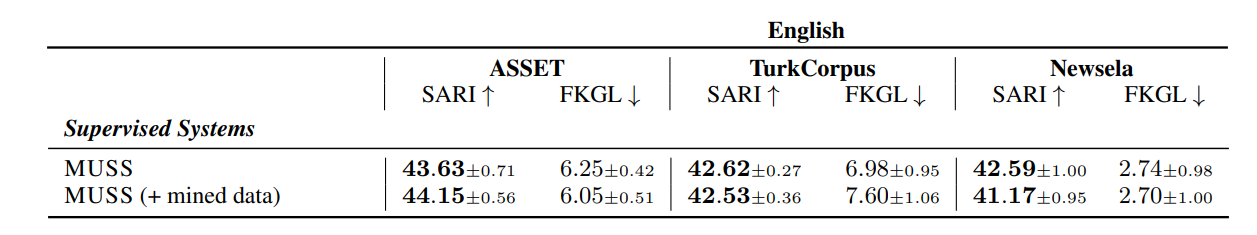

In [2]:
turkcorpus_test = pd.read_csv("turkcorpus_test_dataset.csv", encoding="utf-8").dropna()
pred_sentences = simplify_sentences(turkcorpus_test.text.tolist(), model_name="muss_en_wikilarge_mined")


2022-01-08 21:50:54 | INFO | numexpr.utils | NumExpr defaulting to 2 threads.


/usr/local/lib/python3.7/dist-packages/fairseq/search.py:140: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beams_buf = indices_buf // vocab_size
/usr/local/lib/python3.7/dist-packages/fairseq/sequence_generator.py:651: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = idx // beam_size


In [3]:
sari = corpus_sari(orig_sents=turkcorpus_test.text.tolist(),  
            sys_sents=pred_sentences, 
            refs_sents=turkcorpus_test[["simp_0","simp_1","simp_2","simp_3","simp_4","simp_5","simp_6","simp_7",]].values.T.tolist())


In [4]:
fkgl_scores = [textstat.flesch_kincaid_grade(i) for i in pred_sentences]
fkgl_score = sum(fkgl_scores)/len(fkgl_scores)

print(f"Flesch-Kincaid Grade Level for the ASSET dataset: {fkgl_score}")
print(f"SARI score for the ASSET dataset: {sari}")

Flesch-Kincaid Grade Level for the ASSET dataset: 6.161281337047366
SARI score for the ASSET dataset: 38.929465037007496
